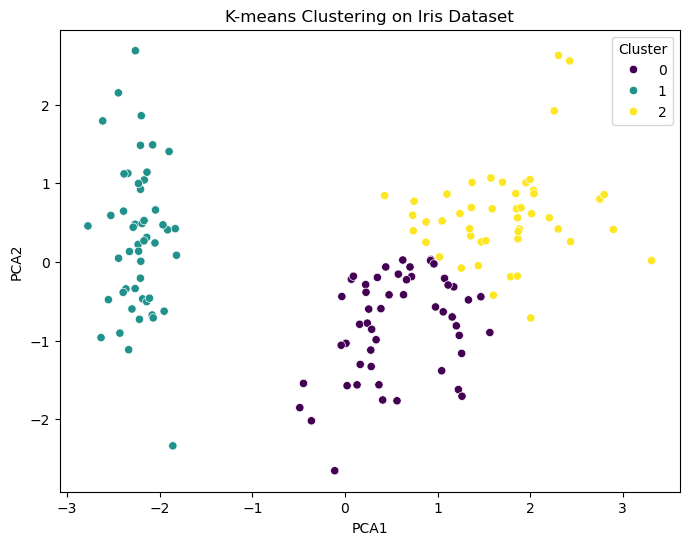

Cluster Centers:
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]

Descriptive Statistics:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 5.801887          2.673585           4.369811   
1                 5.006000          3.428000           1.462000   
2                 6.780851          3.095745           5.510638   

         petal width (cm)      PCA1      PCA2  
Cluster                                        
0                1.413208  0.572621 -0.807209  
1                0.246000 -2.224753  0.288927  
2                1.972340  1.721037  0.602887  


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings('ignore')

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('K-means Clustering on Iris Dataset')
plt.show()

cluster_stats = data.groupby('Cluster').mean()
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("\nDescriptive Statistics:")
print(cluster_stats)